In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

We will examine the math behind Zernike polynomials and use a simple script to generate a surface plot of our desired polynomial.


In [11]:
def Zernike_R(m, n, rho):
    
    if(np.mod(n-m, 2) ==1):
        return rho*0.0

    coeff = rho*0.0
    for k in range(int((n-m)/2+1)):
         coeff += rho**(n-2.0*k)*(-1.0)**k*math.factorial(n-k)/(math.factorial(k)*math.factorial((n+m)/2.0-k)*math.factorial((n-m)/2.0-k))
        
    return coeff

In [12]:
def Zernike(m, n, rho, phi, norm=True):
        
    nc = 1.0
    if (norm):
         nc = (2*(n+1)/(1+(m==0)))**0.5
         print(nc)
         
    if (m > 0): return nc*Zernike_R(m, n, rho) * np.cos(m * phi)
    if (m < 0): return nc*Zernike_R(-m, n, rho) * np.sin(-m * phi)
    return nc*Zernike_R(0, n, rho)
 

In [13]:
def noll_to_zern(j):
    print('Noll index: %s' % (j))
    if (j == 0):
        raise ValueError("Noll indices start at 1, 0 is invalid.")
    n = 0
    while (j > n):
        n += 1
        j -= n
        m = -n+2*j
    
    return (n, m)

In [14]:
def Zernikel(j, rho, phi, norm=True):
    n, m = noll_to_zern(j)
    print('Radial degree: %s, Azimuthal degree, %s' % (n, m))
    return Zernike(m, n, rho, phi, norm)

Noll index: 9
Radial degree: 3, Azimuthal degree, 3
2.8284271247461903


<IPython.core.display.Javascript object>


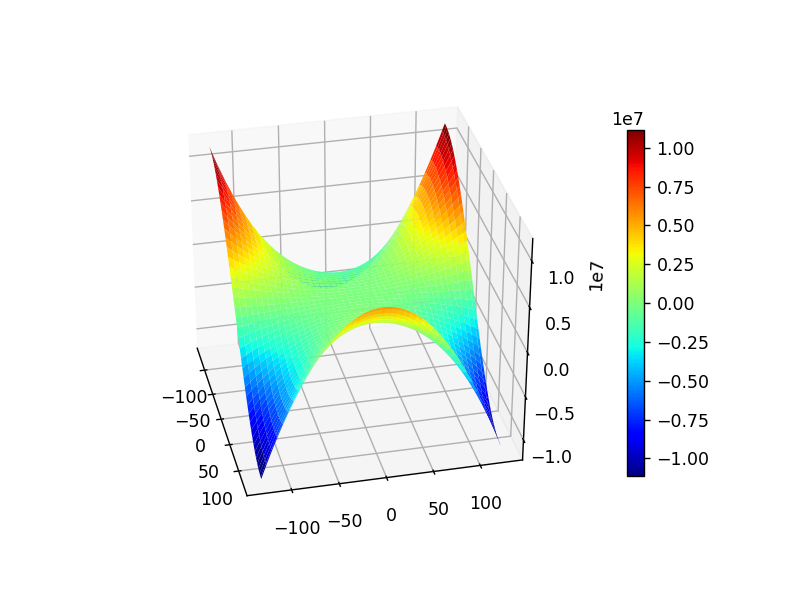

In [18]:
density = 256
pupilRadius = 80
x = np.arange(-density/2, density/2)
X, Y = np.meshgrid(x, x)
R = ((X**2)+(Y**2))**0.5
phi = np.arctan2(Y,X)
rho = np.ones((density, density))
R_norm = R/pupilRadius
rho[R_norm>1]=0

#add rho for circular pupil
z=Zernikel(9, R, phi)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, z ,cmap='jet')
fig.colorbar(surf, shrink=0.75)
 
# Set rotation angle to 360 degrees
ax.view_init(azim=-60)

plt.show()